In [13]:
import matplotlib.pyplot as plt
import random
from tqdm.notebook import tqdm
from collections import Counter

In [2]:
data = []
with open('iris.data', 'r') as f:
    for line in f:
        if line.strip():
            item = line.strip().split(",")
            data.append( ([float(val) for val in item[:-1]], item[-1]) )
species = {s: i for i, s in enumerate(set(d[1] for d in data))}
data = [(d[0], species[d[1]]) for d in data]

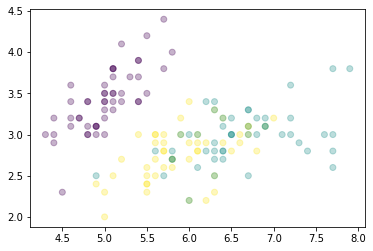

In [3]:
plt.scatter([d[0][0] for d in data],
[d[0][1] for d in data], c=[d[1] for d in data], alpha=0.3)
plt.show()

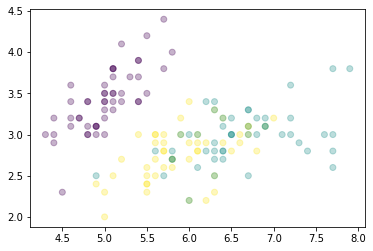

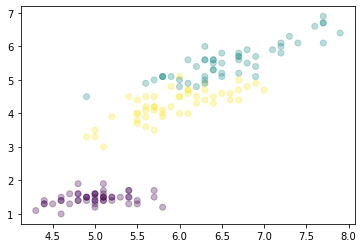

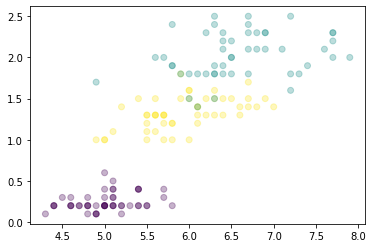

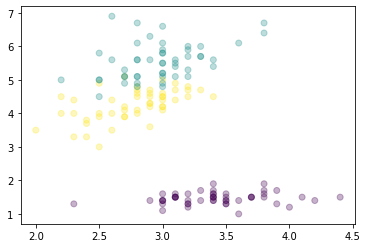

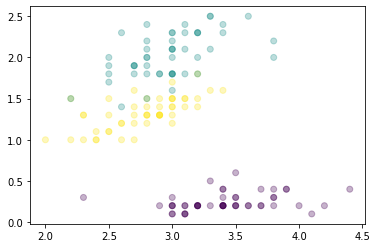

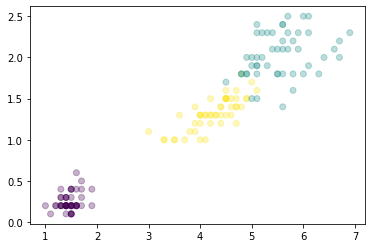

In [4]:
for i in range(4):
    for j in range(i+1,4):
        X = [d[0][i] for d in data]
        Y = [d[0][j] for d in data]
        C = [d[1] for d in data]
        
        plt.scatter(X,Y,c=C,alpha=0.3)
        plt.show()

In [5]:
# train test 분리
random.shuffle(data)
train = data[:-30]
test = data[-30:]

In [6]:
def distance(a, b):
    s = 0
    for i in range(len(a[0])):
        s += (a[0][i] - b[0][i]) ** 2
    return s ** 0.5

In [7]:
def knn_classify(k, query, train):
    knns = sorted((distance(point, query), point) for point in train)[:k]
    # 거리에따라 가중치를 주어 점수 계산
    scores = {}
    for dist, point in knns:
        scores[point[1]] = scores.get(point[1], 0) + 1/(1+dist)
#       x - Counter(d[0][1] for d in knns).most_common(1)
#     return x[0][0]
    resp, score = max(scores.items(), key=lambda x: x[1])
    return resp

In [8]:
test

[([5.4, 3.9, 1.7, 0.4], 0),
 ([5.6, 2.7, 4.2, 1.3], 2),
 ([4.4, 2.9, 1.4, 0.2], 0),
 ([6.6, 2.9, 4.6, 1.3], 2),
 ([5.5, 3.5, 1.3, 0.2], 0),
 ([5.9, 3.0, 4.2, 1.5], 2),
 ([7.7, 3.8, 6.7, 2.2], 1),
 ([6.3, 2.8, 5.1, 1.5], 1),
 ([4.9, 3.1, 1.5, 0.1], 0),
 ([4.4, 3.0, 1.3, 0.2], 0),
 ([6.5, 3.2, 5.1, 2.0], 1),
 ([6.3, 2.3, 4.4, 1.3], 2),
 ([5.5, 2.6, 4.4, 1.2], 2),
 ([6.5, 3.0, 5.5, 1.8], 1),
 ([5.1, 3.4, 1.5, 0.2], 0),
 ([5.6, 2.5, 3.9, 1.1], 2),
 ([5.8, 2.6, 4.0, 1.2], 2),
 ([7.0, 3.2, 4.7, 1.4], 2),
 ([4.6, 3.1, 1.5, 0.2], 0),
 ([6.2, 2.2, 4.5, 1.5], 2),
 ([6.7, 3.1, 5.6, 2.4], 1),
 ([6.0, 2.9, 4.5, 1.5], 2),
 ([6.7, 3.1, 4.7, 1.5], 2),
 ([5.7, 2.8, 4.1, 1.3], 2),
 ([5.6, 2.8, 4.9, 2.0], 1),
 ([6.5, 2.8, 4.6, 1.5], 2),
 ([7.6, 3.0, 6.6, 2.1], 1),
 ([5.0, 3.4, 1.5, 0.2], 0),
 ([7.7, 2.8, 6.7, 2.0], 1),
 ([6.6, 3.0, 4.4, 1.4], 2)]

In [9]:
# 만들어진 함수에 대하여 train 데이터에 삽입한 test data의 근접 Label 찾기 
k = 3
knn_classify(k, test[0], train)

0

In [10]:
k = 3
correct = sum(1 for t in test if knn_classify(k, t, train) == t[1])
accuracy = correct/len(test)
print("accuracy:", accuracy)

accuracy: 0.9666666666666667


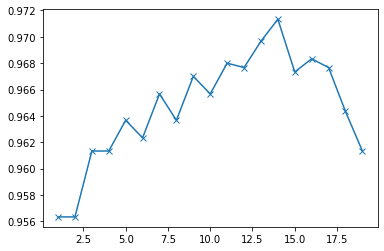

In [11]:
num_trials = 100
train_size = int(len(data) * 0.8)
test_size = len(data) - train_size
X, Y = [], []
corrects = [0]*20
for i in tqdm(range(num_trials)):
    random.shuffle(data)
    train = data[:train_size]
    test = data[train_size:]
    for k in range(1,20):
        corrects[k] += sum(1 for t in test if knn_classify(k, t, train) == t[1])

for k in range(1,20):
    corrects[k] /= num_trials * test_size

plt.plot(range(1,20), corrects[1:], '-x')
plt.show()